# Part 2 : Exploration + Data preprocessing

![title](instructions.png)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import re
import platform
from datetime import datetime, timedelta

In [41]:
# Load the data
booking_df = pd.read_csv('booking.csv')
booking_df.head(2)

,website,snapshot_number,snapshot_date,start_date_str,end_date_str,ttt,los,name,rating,price,reviews_amount
0,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,Hyatt Place NYC Chelsea,7.9\nScored 7.9,₪ 693,"15,066 reviews"
1,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,Hilton Garden Inn New York Times Square South,8.1\nScored 8.1,₪ 651,"4,243 reviews"


In [37]:
def is_weekend_between(start_date_str, end_date_str):
    # Parse the start and end dates
    start_date = datetime.strptime(start_date_str, '%d %B %Y' )
    end_date = datetime.strptime(end_date_str, '%d %B %Y')
    
    # Increment through each day between start and end
    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() >= 5:  # 5 for Saturday, 6 for Sunday
            return True
        current_date += timedelta(days=1)
    
    return False

In [38]:
def extract_numeric(value):
    if isinstance(value, str):
        num_str = re.sub(r'[^\d.]', '', value)
        return float(num_str) if '.' in num_str else int(num_str)
    return value

In [42]:
# Clean the 'rating', 'price', and 'reviews_amount' columns
booking_df['rating'] = booking_df['rating'].apply(lambda x: extract_numeric(x.split('\n')[1] if '\n' in x else x))
booking_df['price'] = booking_df['price'].apply(lambda x: extract_numeric(x))
booking_df['reviews_amount'] = booking_df['reviews_amount'].apply(lambda x: extract_numeric(x))

# add is weekend column
booking_df['weekend'] = booking_df.apply(lambda row: is_weekend_between(row['start_date_str'], row['end_date_str']), axis=1)
booking_df['weekend'] = booking_df['weekend'].astype('int64')
booking_df['ttt'] = booking_df['ttt'].astype('int64')
booking_df['los'] = booking_df['los'].astype('int64')

booking_df.head()

,website,snapshot_number,snapshot_date,start_date_str,end_date_str,ttt,los,name,rating,price,reviews_amount,weekend
0,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,Hyatt Place NYC Chelsea,7.9,693,15066,1
1,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,Hilton Garden Inn New York Times Square South,8.1,651,4243,1
2,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,AC Hotel by Marriott New York Downtown,8.5,608,1780,1
3,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,Hyatt Place New York City/Times Square,7.6,693,21747,1
4,Booking,1,11 May 2024,12 May 2024,13 May 2024,1,1,The Herald by LuxUrban,7.8,655,6647,1


## Visualizations

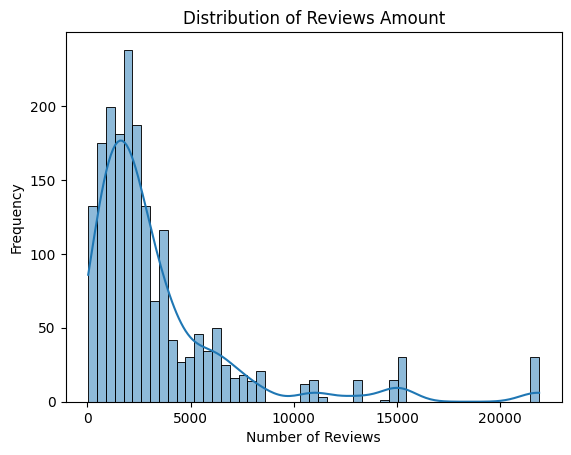

In [43]:
# Assuming data is your DataFrame
sns.histplot(data=booking_df, x='reviews_amount', kde=True)
plt.title('Distribution of Reviews Amount')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

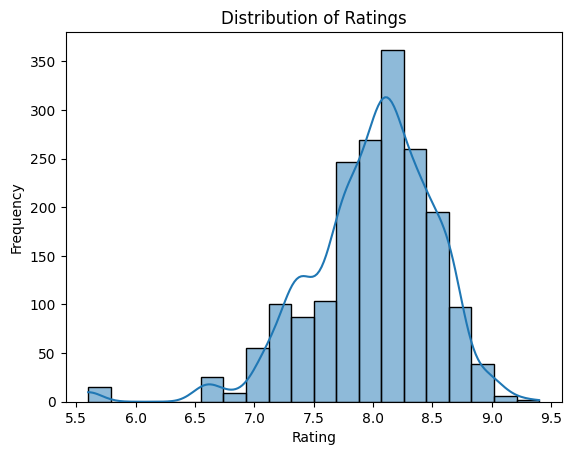

In [44]:
sns.histplot(data=booking_df, x='rating', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

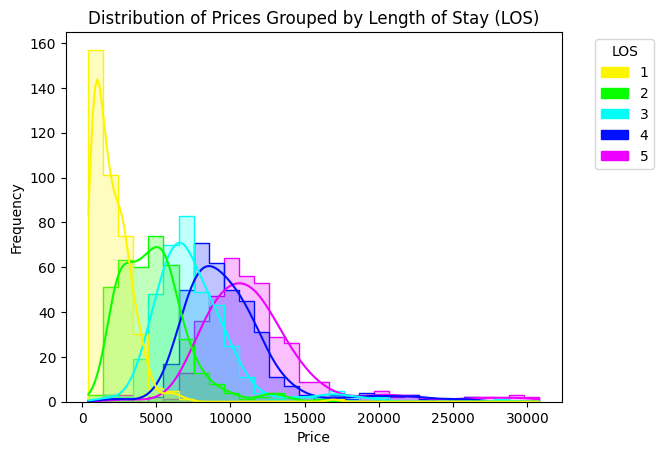

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # For custom legend handles

# Convert 'los' to string to ensure it is treated as a categorical variable
booking_df['los'] = booking_df['los'].astype(str)

# Generate a distinct color palette for each unique LOS value
palette = sns.color_palette("hsv", len(booking_df['los'].unique()))

# Create the histogram plot
fig, ax = plt.subplots()
sns.histplot(data=booking_df, x='price', hue='los', palette=palette, element='step', kde=True, bins=30, ax=ax)

# Set plot titles and labels
ax.set_title('Distribution of Prices Grouped by Length of Stay (LOS)')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Create a custom legend
handles = [mpatches.Patch(color=palette[i], label=label) for i, label in enumerate(booking_df['los'].unique())]
ax.legend(handles=handles, title='LOS', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


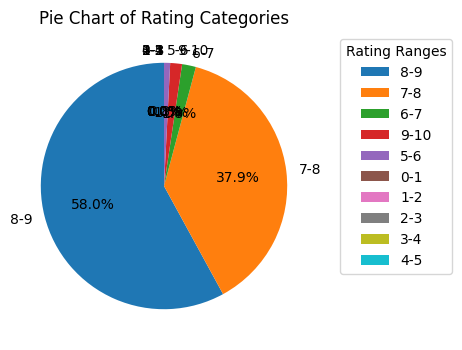

In [47]:
# Categorize ratings into bins from 0-1, 1-2, ..., 9-10
booking_df['rating_category'] = pd.cut(booking_df['rating'], bins=np.arange(0, 11, 1), right=False, labels=[f"{i}-{i+1}" for i in range(10)])

# Count the frequency of each category
rating_counts = booking_df['rating_category'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 4))
pie = plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Rating Categories')
plt.legend(title='Rating Ranges', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

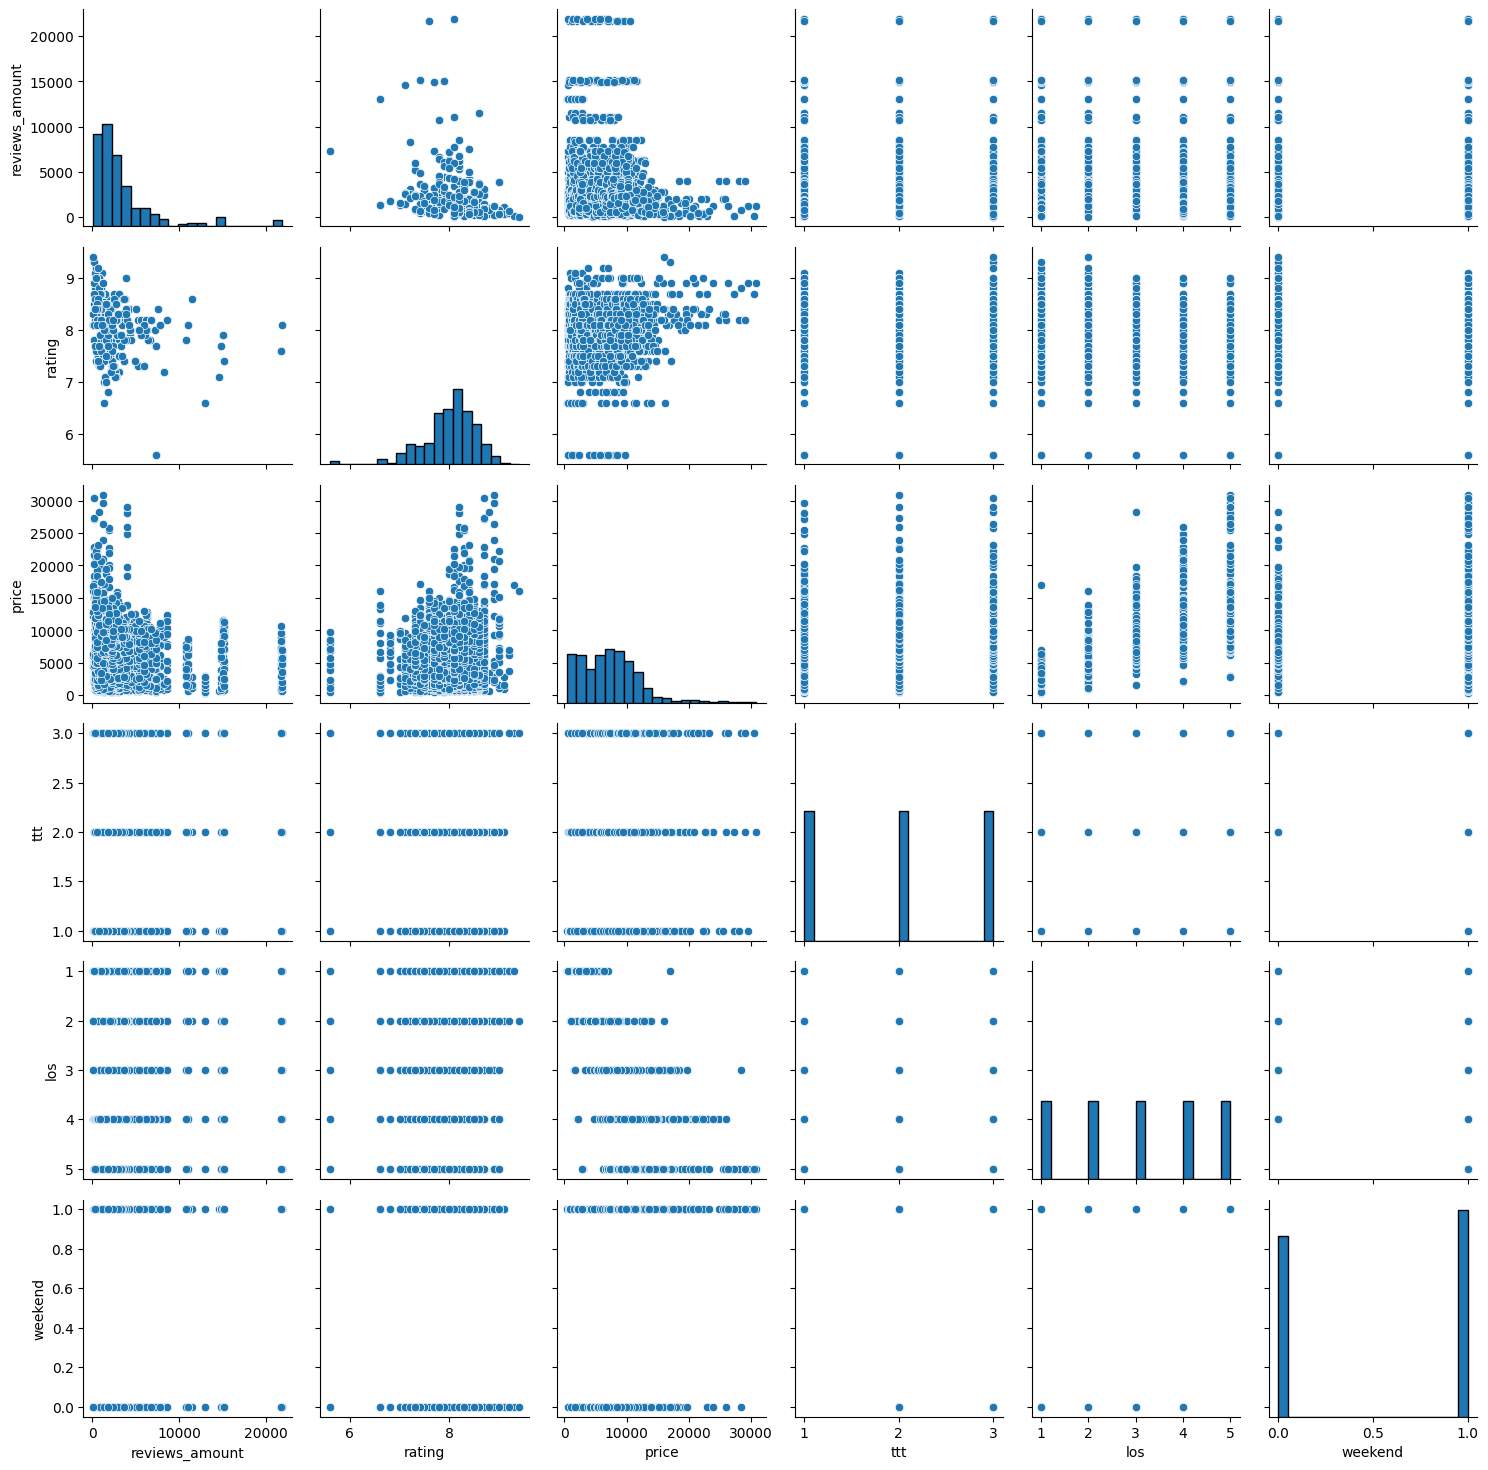

In [51]:
# Seaborn PairGrid for exploring relationships
pair_grid = sns.PairGrid(booking_df, vars=['reviews_amount', 'rating', 'price','ttt','los','weekend'])
pair_grid = pair_grid.map_diag(plt.hist, bins=20, edgecolor='k')
pair_grid = pair_grid.map_offdiag(sns.scatterplot)
plt.show()

In [ ]:
## save